In [ ]:
import pickle
from tkinter.tix import COLUMN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.base import clone
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#import matplotlib as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model2/model2_csv/Train2.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model2/model2_excel/Train2.csv')
emotion_train = train["emotionID"]
set(emotion_train)
result = pd.concat([df, train["sex"],emotion_train], axis=1)
df_train=result.drop(columns=["target"])
df_train["sex"].replace({"f": 0, "m": 1}, inplace=True)
df_train

,Unnamed: 0,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,tempogram_382,tempogram_383,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,sex,emotionID
0,C:/Users/vcc/Desktop/project ml/voice/9196.wav,-364.94345,58.359630,2.820225,5.529991,0.165158,12.045059,1.448689,-5.378034,-9.409033,...,1.065503e-17,8.264991e-18,-0.010307,0.003076,0.022825,0.051463,0.011787,-0.009172,0,3
1,C:/Users/vcc/Desktop/project ml/voice/16133.wav,-387.11218,92.776024,-15.819464,33.206528,1.054645,10.347558,-1.730025,8.410479,6.219111,...,2.579631e-17,2.283440e-17,-0.042363,0.042854,-0.013355,-0.110958,0.025752,-0.025277,0,1
2,C:/Users/vcc/Desktop/project ml/voice/4156.wav,-420.34683,103.964935,0.789253,30.104149,-7.518121,10.094464,-19.800411,-1.656142,-7.244540,...,1.338170e-17,1.390605e-17,0.028776,-0.003118,0.051828,0.011517,0.004023,0.004716,1,4
3,C:/Users/vcc/Desktop/project ml/voice/203.wav,-400.54904,103.331710,20.483711,29.738617,10.878419,3.691131,-2.093715,9.150126,6.001769,...,3.044141e-17,2.452205e-17,-0.027109,-0.014485,-0.003280,-0.099250,0.011699,-0.008414,1,4
4,C:/Users/vcc/Desktop/project ml/voice/4917.wav,-216.08072,61.822456,-8.624993,-0.100680,-14.465156,-10.361802,1.479756,-4.632538,-13.703397,...,1.835793e-18,1.709946e-17,-0.013564,0.011575,-0.015613,0.009228,-0.005703,-0.003755,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11992,C:/Users/vcc/Desktop/project ml/voice/16144.wav,-493.76923,118.193620,-19.474787,47.368202,-4.860471,8.465796,-4.050439,6.528437,-1.920165,...,1.658500e-17,2.175022e-17,0.042150,0.026910,-0.000645,0.003364,-0.006610,0.003278,0,4
11993,C:/Users/vcc/Desktop/project ml/voice/1750.wav,-441.23830,68.922330,29.351257,27.767723,9.790405,19.638962,12.368877,-2.788193,-3.835782,...,6.869883e-18,1.143487e-18,-0.031688,0.016086,-0.024533,0.048363,0.036236,-0.017237,0,4
11994,C:/Users/vcc/Desktop/project ml/voice/1673.wav,-332.97794,74.275660,30.321781,14.730898,17.161760,5.759981,11.191778,5.152507,6.918223,...,1.494454e-17,2.848889e-17,-0.025926,0.000929,-0.076368,-0.004775,0.012181,0.009368,1,3
11995,C:/Users/vcc/Desktop/project ml/voice/11784.wav,-459.31543,75.078064,8.145429,31.015642,1.469157,9.187110,4.536473,1.235650,1.000868,...,1.178312e-17,2.756702e-17,0.045444,0.023344,0.058454,-0.004126,0.025204,-0.013217,0,3


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model2/model2_csv/Test2.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model2/model2_excel/Test2.csv')
emotion_train = train["emotionID"]
set(emotion_train)
result = pd.concat([df, train["sex"],emotion_train], axis=1)
df_test=result.drop(columns=["target"])
df_test["sex"].replace({"f": 0, "m": 1}, inplace=True)
df_test

,Unnamed: 0,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,tempogram_382,tempogram_383,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,sex,emotionID
0,C:/Users/vcc/Desktop/project ml/voice/9344.wav,-505.86703,90.927670,50.811844,46.253925,21.828745,18.075613,3.674863,-3.278383,4.984287,...,1.753767e-17,2.565021e-17,0.074273,0.045284,0.173617,-0.021284,0.002736,-0.035215,1,3
1,C:/Users/vcc/Desktop/project ml/voice/12547.wav,-415.33710,96.606150,25.525356,31.204031,-5.861326,8.170014,-8.523556,-0.566638,-9.987669,...,1.068843e-17,2.590136e-17,-0.052392,-0.009066,-0.036222,0.096223,0.007650,0.002427,1,2
2,C:/Users/vcc/Desktop/project ml/voice/11416.wav,-394.90335,115.636820,8.155794,20.469270,2.609663,16.974703,-21.057484,15.903380,-10.881305,...,1.265895e-17,2.381629e-17,-0.005245,-0.046894,-0.032342,0.023598,0.028529,-0.004028,1,3
3,C:/Users/vcc/Desktop/project ml/voice/13091.wav,-211.31772,133.582140,-25.216316,12.453365,-31.373760,5.483029,-14.456090,-24.726824,-11.366259,...,6.409966e-18,-8.634525e-19,-0.005213,-0.041483,-0.012330,-0.020854,-0.018228,0.023352,1,2
4,C:/Users/vcc/Desktop/project ml/voice/15864.wav,-463.76688,130.353880,-0.246942,23.904879,1.496812,10.103725,-22.894894,6.832997,-8.986013,...,1.449830e-17,2.280265e-17,0.006945,0.050537,-0.013286,0.001660,-0.009420,-0.018993,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,C:/Users/vcc/Desktop/project ml/voice/415.wav,-520.99010,76.673530,-13.955746,28.225765,-0.103527,-20.673664,-14.641736,7.766248,-9.842073,...,-4.578098e-18,1.398697e-18,-0.010583,-0.004469,-0.026875,-0.019898,0.001768,0.009172,1,1
3329,C:/Users/vcc/Desktop/project ml/voice/9548.wav,-363.66486,121.069305,-6.165410,23.450203,-3.538832,-0.146308,-4.288898,-6.522939,-14.068184,...,2.840874e-17,4.070046e-17,0.039948,0.030738,-0.006072,-0.045371,-0.025829,-0.015018,1,2
3330,C:/Users/vcc/Desktop/project ml/voice/5933.wav,-392.01880,108.106830,-2.740813,23.881542,-5.648860,3.114533,-10.559357,3.632669,-8.072955,...,5.926913e-17,7.656482e-17,0.009681,0.019442,0.055938,0.052546,0.004331,0.005918,1,1
3331,C:/Users/vcc/Desktop/project ml/voice/5635.wav,-335.09702,97.686615,0.157730,40.329950,-8.645594,25.945732,-2.471781,-3.563193,-0.374251,...,1.973473e-17,2.774610e-17,0.037246,0.025011,0.026386,-0.025918,0.007564,-0.008521,0,3


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model2/model2_csv/Val2.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model2/model2_excel/Validation2.csv')
emotion_train = train["emotionID"]
set(emotion_train)
result = pd.concat([df, train["sex"],emotion_train], axis=1)
df_val=result.drop(columns=["target"])
df_val["sex"].replace({"f": 0, "m": 1}, inplace=True)
df_val

,Unnamed: 0,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,tempogram_382,tempogram_383,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,sex,emotionID
0,C:/Users/vcc/Desktop/project ml/voice/6832.wav,-488.58350,125.363884,-12.504966,37.198204,-2.702445,-5.722758,-12.373598,2.467718,-15.723393,...,1.008299e-17,2.442923e-17,-0.010529,0.009685,-0.045360,-0.005832,-0.014860,-0.006074,0,4
1,C:/Users/vcc/Desktop/project ml/voice/7611.wav,-566.28910,125.519900,17.920944,38.151070,7.487829,0.276249,4.609295,-5.386468,0.870111,...,2.162346e-17,3.703701e-17,-0.044944,0.045926,0.053722,-0.003690,0.030615,-0.040445,0,3
2,C:/Users/vcc/Desktop/project ml/voice/13210.wav,-290.08643,74.740100,8.774795,-14.485182,-27.042484,-16.336575,-22.957893,-13.053991,-13.188375,...,8.787469e-18,2.766792e-18,0.025363,-0.033435,0.006269,-0.064963,-0.006925,-0.015261,0,1
3,C:/Users/vcc/Desktop/project ml/voice/9354.wav,-435.74634,78.541080,14.673229,12.379173,0.282971,8.887095,8.048609,-6.324754,-5.481674,...,5.739300e-18,1.162928e-17,0.032007,0.030585,0.013155,-0.043434,-0.000372,0.002547,1,1
4,C:/Users/vcc/Desktop/project ml/voice/8606.wav,-465.05390,60.186516,2.840247,4.360996,-7.749868,-15.018993,-12.471092,2.004046,-0.175942,...,-4.158133e-18,-8.077788e-19,0.009873,-0.074426,0.000372,-0.102519,0.002005,0.048481,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,C:/Users/vcc/Desktop/project ml/voice/15239.wav,-496.83182,94.452484,-14.680283,30.726557,-6.597310,27.247398,-12.261194,6.138174,2.913280,...,3.106750e-17,3.391439e-17,0.036700,0.029420,0.041282,-0.068457,0.042870,0.017423,0,3
1329,C:/Users/vcc/Desktop/project ml/voice/12224.wav,-469.32635,80.955300,1.178256,21.138077,0.469207,5.897948,-3.527771,-2.625922,-0.853007,...,3.801361e-17,4.132647e-17,-0.031110,0.017098,-0.014034,-0.002092,-0.025279,-0.015825,0,3
1330,C:/Users/vcc/Desktop/project ml/voice/11510.wav,-478.77884,111.673510,44.104317,19.154287,7.983385,19.212233,17.093990,9.567336,-5.685280,...,5.162369e-18,1.481872e-17,0.044655,-0.023754,-0.024227,0.035210,0.037692,-0.028760,1,1
1331,C:/Users/vcc/Desktop/project ml/voice/371.wav,-309.57825,116.987755,-39.851376,-0.554212,11.380273,7.968697,-21.223793,1.485160,-28.879356,...,2.628038e-18,-6.710867e-18,-0.035682,0.060960,-0.056425,-0.052387,0.032046,-0.022562,0,1


In [ ]:
frames = [df_train, df_val, df_test]

df = pd.concat(frames)
df

,Unnamed: 0,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,tempogram_382,tempogram_383,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,sex,emotionID
0,C:/Users/vcc/Desktop/project ml/voice/9196.wav,-364.94345,58.359630,2.820225,5.529991,0.165158,12.045059,1.448689,-5.378034,-9.409033,...,1.065503e-17,8.264991e-18,-0.010307,0.003076,0.022825,0.051463,0.011787,-0.009172,0,3
1,C:/Users/vcc/Desktop/project ml/voice/16133.wav,-387.11218,92.776024,-15.819464,33.206528,1.054645,10.347558,-1.730025,8.410479,6.219111,...,2.579631e-17,2.283440e-17,-0.042363,0.042854,-0.013355,-0.110958,0.025752,-0.025277,0,1
2,C:/Users/vcc/Desktop/project ml/voice/4156.wav,-420.34683,103.964935,0.789253,30.104149,-7.518121,10.094464,-19.800411,-1.656142,-7.244540,...,1.338170e-17,1.390605e-17,0.028776,-0.003118,0.051828,0.011517,0.004023,0.004716,1,4
3,C:/Users/vcc/Desktop/project ml/voice/203.wav,-400.54904,103.331710,20.483711,29.738617,10.878419,3.691131,-2.093715,9.150126,6.001769,...,3.044141e-17,2.452205e-17,-0.027109,-0.014485,-0.003280,-0.099250,0.011699,-0.008414,1,4
4,C:/Users/vcc/Desktop/project ml/voice/4917.wav,-216.08072,61.822456,-8.624993,-0.100680,-14.465156,-10.361802,1.479756,-4.632538,-13.703397,...,1.835793e-18,1.709946e-17,-0.013564,0.011575,-0.015613,0.009228,-0.005703,-0.003755,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,C:/Users/vcc/Desktop/project ml/voice/415.wav,-520.99010,76.673530,-13.955746,28.225765,-0.103527,-20.673664,-14.641736,7.766248,-9.842073,...,-4.578098e-18,1.398697e-18,-0.010583,-0.004469,-0.026875,-0.019898,0.001768,0.009172,1,1
3329,C:/Users/vcc/Desktop/project ml/voice/9548.wav,-363.66486,121.069305,-6.165410,23.450203,-3.538832,-0.146308,-4.288898,-6.522939,-14.068184,...,2.840874e-17,4.070046e-17,0.039948,0.030738,-0.006072,-0.045371,-0.025829,-0.015018,1,2
3330,C:/Users/vcc/Desktop/project ml/voice/5933.wav,-392.01880,108.106830,-2.740813,23.881542,-5.648860,3.114533,-10.559357,3.632669,-8.072955,...,5.926913e-17,7.656482e-17,0.009681,0.019442,0.055938,0.052546,0.004331,0.005918,1,1
3331,C:/Users/vcc/Desktop/project ml/voice/5635.wav,-335.09702,97.686615,0.157730,40.329950,-8.645594,25.945732,-2.471781,-3.563193,-0.374251,...,1.973473e-17,2.774610e-17,0.037246,0.025011,0.026386,-0.025918,0.007564,-0.008521,0,3


# train and test split

In [ ]:

from sklearn.model_selection import train_test_split
X = df.drop(['sex','emotionID','Unnamed: 0'],1)   #Feature Matrix
y = df["emotionID"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



# classification emotion with pca 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
len(explained_variance)

39

## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = make_pipeline(preprocessing.StandardScaler(),RandomForestClassifier(max_depth=19, random_state=0))
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:

print('Accuracy random forest with pca: ' , accuracy_score(y_test, y_pred))

Accuracy random forest with pca:  0.4440888177635527


## mlp

In [ ]:
from sklearn.preprocessing import StandardScaler,scale
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)
#X_test = sc.transform(X_test)

clf = make_pipeline(preprocessing.StandardScaler(),  MLPClassifier(alpha=0.1,hidden_layer_sizes=(4, 2), random_state=0))
clf = clf.fit(X_train, y_train)
y_hat=clf.predict(X_test)

print('accuracy:\n',accuracy_score(y_test, y_hat))

accuracy:
 0.4298859771954391


# svm

In [ ]:
from sklearn import svm
classifier = make_pipeline(preprocessing.StandardScaler(),svm.SVC(kernel='rbf',C=10))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.47709541908381675
Accuracy train 0.6842421124828533


In [ ]:
from sklearn import svm
classifier = make_pipeline(preprocessing.StandardScaler(),svm.SVC(kernel='poly',C=10))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.4480896179235847
Accuracy train 0.7487997256515775


# classification with out pca

In [ ]:
X = df.drop(['sex','emotionID','Unnamed: 0'],1)   #Feature Matrix
y = df["emotionID"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
from sklearn.preprocessing import StandardScaler,scale
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)
#X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=10, random_state=0)
classifier=classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('accuracy test:\n',accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

accuracy test:
 0.4474894978995799
Accuracy train 0.8516803840877915


In [ ]:
# decision tree
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = clf.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.33766753350670137
Accuracy train 0.9992283950617284


## mlp

In [ ]:
from sklearn.preprocessing import StandardScaler,scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)
#X_test = sc.transform(X_test)

clf = make_pipeline(preprocessing.StandardScaler(),  MLPClassifier(alpha=0.1,hidden_layer_sizes=(4, 2), random_state=0))
clf = clf.fit(X_train, y_train)
y_hat=clf.predict(X_test)

print('accuracy:\n',accuracy_score(y_test, y_hat))
y_pred1 = clf.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))



accuracy:
 0.44224422442244227
Accuracy train 0.48454613653413353


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X,y, cv=5, scoring='accuracy')
scores

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning:

Training interrupted by user.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning:

Training interrupted by user.



array([0.43, 0.45, 0.44, 0.45, 0.43])

In [ ]:
print("%0.2f accuracy with out pca" % (scores.mean()))

0.44 accuracy with out pca


In [ ]:
from sklearn import svm
classifier = make_pipeline(preprocessing.StandardScaler(),svm.SVC(kernel='poly',C=10))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.42604260426042606
Accuracy train 0.5786946736684171


In [ ]:
from sklearn import svm
classifier = make_pipeline(preprocessing.StandardScaler(),svm.SVC(kernel='rbf',C=10))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.4971497149714971
Accuracy train 0.695873968492123


In [ ]:
from sklearn import svm
classifier = make_pipeline(preprocessing.StandardScaler(),svm.SVC(kernel='rbf',C=1,gamma=0.01))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.47374737473747375
Accuracy train 0.7381845461365342


In [ ]:
from sklearn import svm
classifier = make_pipeline(preprocessing.StandardScaler(),svm.SVC(kernel='rbf',C=50))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.49054905490549056
Accuracy train 0.8432108027006752


# lda

In [ ]:
from sklearn.preprocessing import StandardScaler,scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)
#X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import svm
classifier = svm.SVC(kernel='poly',C=10,degree=3,gamma=0.03)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.29085817163432687
Accuracy train 0.4568758573388203


## naive bayes

In [ ]:
nb = GaussianNB()

nb=nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = nb.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.28305661132226445
Accuracy train 0.48996913580246915


In [ ]:
classifier = svm.SVC(kernel='rbf',C=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.26905381076215246
Accuracy train 0.5031721536351166


# sfs 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)
#X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 1.0950302 ,  1.10589828, -0.19438813, ..., -0.3330714 ,
        -0.11645978, -0.97966377],
       [-1.48453698,  0.05668104,  1.63576669, ..., -0.37907755,
        -0.45879566,  1.96736662],
       [ 1.71089678, -1.01775775, -1.59037357, ...,  0.58729599,
         0.07064306, -0.20108417],
       ...,
       [-0.17274628,  1.56540275, -1.0352224 , ...,  0.51728683,
         0.1139022 , -0.51606079],
       [-0.55193515,  0.91780397, -0.76793576, ..., -0.09090046,
         0.4497492 , -0.43830383],
       [-2.36661251, -1.03021376,  0.42925734, ...,  0.52332106,
        -0.1923096 , -0.71545929]])

# mutual info for emotion

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)
print(mi_score)

[0.07090657 0.00680128 0.02502944 0.02128442 0.01245491 0.02506492
 0.0147331  0.00136495 0.01509588 0.01246354 0.01424989 0.00945128
 0.         0.00427651 0.00741781 0.00920577 0.00588467 0.00291466
 0.00072601 0.00240938 0.00729211 0.02531685 0.01667034 0.01810984
 0.02142968 0.04224466 0.05069812 0.06636918 0.08159586 0.07304733
 0.07321754 0.06868646 0.06481769 0.05677521 0.05781785 0.06547539
 0.06463985 0.07294275 0.07430756 0.07279123 0.07787016 0.08656685
 0.08977488 0.08507911 0.09106977 0.08634012 0.08226235 0.08252252
 0.08747235 0.08948894 0.09075745 0.08343135 0.0931396  0.08660851
 0.0835867  0.09275695 0.08547258 0.08889038 0.08165871 0.09072766
 0.10087995 0.09888656 0.08470593 0.08938482 0.0903514  0.08262508
 0.08326505 0.08564308 0.08345108 0.0788058  0.07661221 0.06581481
 0.07526095 0.07524495 0.07448777 0.08374033 0.08394852 0.08257132
 0.07075653 0.08469577 0.08780495 0.08274528 0.08580751 0.07814918
 0.08429807 0.08484798 0.0917148  0.08390971 0.07970461 0.0755

<function matplotlib.pyplot.show>

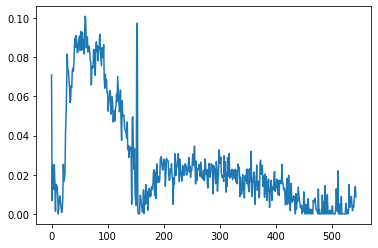

In [ ]:
plt.plot(mi_score)
plt.show

In [ ]:
# prepare dataset 2, MI > 0.2
mi_score_selected_index = np.where(mi_score > 0.01)[0]
X_2 = X[:, mi_score_selected_index]
X_train_2, X_test_2, y_train, y_test = train_test_split(
    X_2, y, random_state=0, stratify=y
)


TypeError: ignored

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif


In [ ]:

selector = SelectPercentile(mutual_info_classif, percentile=20)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(16663, 109)

In [ ]:

cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns


['zero_crossing_rate_0',
 'tempogram_29',
 'tempogram_34',
 'tempogram_40',
 'tempogram_41',
 'tempogram_42',
 'tempogram_43',
 'tempogram_44',
 'tempogram_46',
 'tempogram_47',
 'tempogram_48',
 'tempogram_51',
 'tempogram_52',
 'tempogram_53',
 'tempogram_54',
 'tempogram_58',
 'tempogram_60',
 'tempogram_66',
 'tempogram_67',
 'tempogram_69',
 'tempogram_70',
 'tempogram_71',
 'tempogram_72',
 'tempogram_73',
 'tempogram_75',
 'tempogram_76',
 'tempogram_80',
 'tempogram_84',
 'tempogram_85',
 'tempogram_86',
 'tempogram_88',
 'tempogram_90',
 'tempogram_91',
 'tempogram_92',
 'tempogram_93',
 'tempogram_95',
 'tempogram_97',
 'tempogram_98',
 'tempogram_99',
 'tempogram_100',
 'tempogram_101',
 'tempogram_102',
 'tempogram_104',
 'tempogram_106',
 'tempogram_107',
 'tempogram_110',
 'tempogram_112',
 'tempogram_117',
 'tempogram_120',
 'tempogram_123',
 'tempogram_127',
 'tempogram_131',
 'tempogram_132',
 'tempogram_133',
 'tempogram_135',
 'tempogram_136',
 'tempogram_137',
 'tem

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=4)


nb = GaussianNB()

nb=nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = nb.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))




Accuracy 0.3414341434143414
Accuracy train 0.3454613653413353


In [ ]:
classifier = svm.SVC(kernel='rbf',C=10)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.40534053405340537
Accuracy train 0.4162040510127532


### gridsearch for svm

In [ ]:
X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [
   {"kernel": ["poly"], 'degree' : [2, 3, 4],'C' : [1, 10], 'gamma' : [0.01, 0.03]},
   {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["rbf"], "gamma": [0.1, 0.3, 0.5], "C": [1, 10]}
]

clf = GridSearchCV(
    estimator=svm.SVC(),
    param_grid=tuned_parameters,
     scoring='accuracy',
     cv=5,
     verbose=0
)
clf.fit(X_train, y_train)
print(clf.best_params_)

In [ ]:
classifier = svm.SVC(kernel='rbf',C=1,gamma=0.1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.7611761176117612
Accuracy train 0.8308327081770442


## decision tree with mutual information and scaling

In [ ]:
from sklearn.preprocessing import StandardScaler,scale

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=4)
X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = clf.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.28742874287428744
Accuracy train 0.9990997749437359


# new



---
# ml final project classification




In [ ]:
X = df.drop(['sex','emotionID','Unnamed: 0'],1)   #Feature Matrix
y = df["emotionID"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
from sklearn.preprocessing import StandardScaler,scale
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)
#X_test = sc.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



## confusion matrix

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lr_clf = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', class_weight='balanced' , C = 0.1))     # Best Result
lr_clf.fit(X_train, y_train)
lr_yhat = lr_clf.predict(X_test)

In [ ]:
import plotly.express as px
from sklearn import metrics

lr_acc_train = round( metrics.accuracy_score(y_train, lr_clf.predict(X_train))*100 ,2)
lr_acc_test = round( metrics.accuracy_score(y_test, lr_yhat)*100 ,2)
lr_jac_train = round( metrics.jaccard_score(y_train, lr_clf.predict(X_train),average='weighted')*100 ,2)
lr_jac_test = round( metrics.jaccard_score(y_test, lr_yhat,average='weighted')*100 ,2)

lr_df1 = pd.DataFrame({'percent':[lr_acc_train,lr_acc_test,lr_jac_train,lr_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(lr_df1 , x='metric' , y='percent' , color='label' ,
             title='Logistic Regression Accuracy/Jaccard for Train/Test Data (First Try)' ,
             text="percent", barmode="group")
fig.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

print("Train set Accuracy: %", round( 100* metrics.accuracy_score(y_train, lr_clf.predict(X_train))))
print("Test set Accuracy: %", round( 100* metrics.accuracy_score(y_test, lr_yhat)))
print('')
print (classification_report(y_test, lr_yhat))

Train set Accuracy: % 49
Test set Accuracy: % 45

              precision    recall  f1-score   support

           1       0.51      0.50      0.50      1243
           2       0.49      0.49      0.49      1234
           3       0.42      0.47      0.44      1235
           4       0.40      0.37      0.38      1287

    accuracy                           0.45      4999
   macro avg       0.45      0.45      0.45      4999
weighted avg       0.45      0.45      0.45      4999



Confusion matrix, without normalization


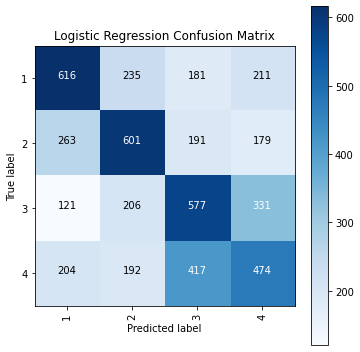

In [ ]:
lr_cnf_matrix = confusion_matrix(y_test, lr_yhat)
np.set_printoptions(precision=2)

labels = [1,2,3,4]

plt.figure(figsize=(5,5))
plot_confusion_matrix(lr_cnf_matrix, classes=labels ,normalize= False,  title='Logistic Regression Confusion Matrix')

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr_yhat)

array([[616, 235, 181, 211],
       [263, 601, 191, 179],
       [121, 206, 577, 331],
       [204, 192, 417, 474]])

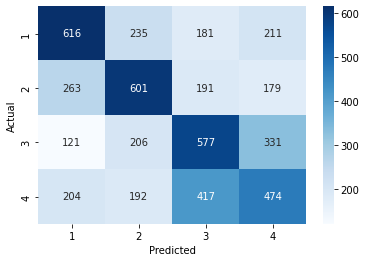

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = pd.crosstab(y_test, lr_yhat, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,cmap='Blues' , fmt='')
plt.show()

## cross validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn import preprocessing


scores = ['f1_weighted', 'precision_weighted', 'recall_weighted','accuracy']

lr_clf = make_pipeline(preprocessing.StandardScaler(), LogisticRegression(solver='liblinear', class_weight='balanced' , C = 0.1))
# cross_validate(lr_clf, X, Y, cv=5, scoring=scores)

lr_avg_f1_weighted  = cross_validate(lr_clf, X, y, cv=5, scoring=scores)['test_f1_weighted'].mean()*100
lr_avg_prc_weighted = cross_validate(lr_clf, X, y, cv=5, scoring=scores)['test_precision_weighted'].mean()*100
lr_avg_rec_weighted = cross_validate(lr_clf, X, y, cv=5, scoring=scores)['test_recall_weighted'].mean()*100
lr_avg_acc          = cross_validate(lr_clf, X, y, cv=5, scoring=scores)['test_accuracy'].mean()*100

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_clf, X,y, cv=5, scoring='accuracy')
print(scores)
print('accuracy cross validation logistic regresion :',scores.mean())

[0.89 0.89 0.88 0.87 0.88]
accuracy cross validation logistic regresion : 0.8810533034095727


# svm

In [ ]:
from sklearn import svm
svm_clf = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf',C=10))
svm_clf.fit(X_train,y_train)
svm_yhat = svm_clf.predict(X_test)

In [ ]:
svm_acc_train = round( metrics.accuracy_score(y_train, svm_clf.predict(X_train))*100 ,2)
svm_acc_test = round( metrics.accuracy_score(y_test, svm_yhat)*100 ,2)
svm_jac_train = round( metrics.jaccard_score(y_train, svm_clf.predict(X_train),average='weighted')*100 ,2)
svm_jac_test = round( metrics.jaccard_score(y_test, svm_yhat,average='weighted')*100 ,2)

svm_df1 = pd.DataFrame({'percent':[svm_acc_train,svm_acc_test,svm_jac_train,svm_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(svm_df1 , x='metric' , y='percent' , color='label' ,
             title='SVM Accuracy/Jaccard for Train/Test Data (First Try)' ,
             text="percent", barmode="group")
fig.show()

In [ ]:
print("Train set Accuracy: %", round( 100* metrics.accuracy_score(y_train, svm_clf.predict(X_train))))
print("Test set Accuracy: %", round( 100* metrics.accuracy_score(y_test, svm_yhat))) 
print('')
print (classification_report(y_test, svm_yhat))

Train set Accuracy: % 70
Test set Accuracy: % 49

              precision    recall  f1-score   support

           1       0.55      0.52      0.53      1243
           2       0.55      0.49      0.52      1234
           3       0.47      0.46      0.46      1235
           4       0.43      0.51      0.47      1287

    accuracy                           0.49      4999
   macro avg       0.50      0.49      0.50      4999
weighted avg       0.50      0.49      0.50      4999



Confusion matrix, without normalization


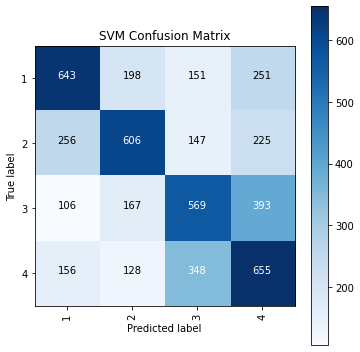

In [ ]:
from sklearn.metrics import confusion_matrix
svm_cnf_matrix = confusion_matrix(y_test, svm_yhat)
np.set_printoptions(precision=2)

labels = [1,2,3,4]

plt.figure(figsize=(5,5))
plot_confusion_matrix(svm_cnf_matrix, classes=labels ,normalize= False,  title='SVM Confusion Matrix')

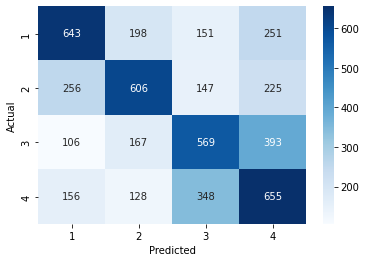

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = pd.crosstab(y_test, svm_yhat, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,cmap='Blues' , fmt='')
plt.show()

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn import preprocessing

svm_clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(kernel='rbf',C=10))
# cross_validate(svm_clf, X, Y, cv=5, scoring=scores)

svm_avg_f1_weighted  = cross_validate(svm_clf, X, y, cv=5, scoring=scores)['test_f1_weighted'].mean()*100
svm_avg_prc_weighted = cross_validate(svm_clf, X, y, cv=5, scoring=scores)['test_precision_weighted'].mean()*100
svm_avg_rec_weighted = cross_validate(svm_clf, X, y, cv=5, scoring=scores)['test_recall_weighted'].mean()*100
svm_avg_acc          = cross_validate(svm_clf, X, y, cv=5, scoring=scores)['test_accuracy'].mean()*100

## K_nn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


Ks = 51
mean_acc = np.zeros((Ks-1))
mean_rec = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors = n)).fit(X_train,y_train)
    knn_yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_yhat)
    std_acc[n-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

mean_acc 

array([0.39, 0.38, 0.38, 0.4 , 0.41, 0.4 , 0.41, 0.41, 0.41, 0.42, 0.42,
       0.42, 0.41, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.43,
       0.43, 0.42, 0.42, 0.42, 0.42, 0.41, 0.42, 0.42, 0.42, 0.42, 0.42,
       0.42, 0.42, 0.42, 0.42, 0.42, 0.42, 0.41, 0.42, 0.42, 0.42, 0.42,
       0.42, 0.42, 0.42, 0.42, 0.42, 0.41])

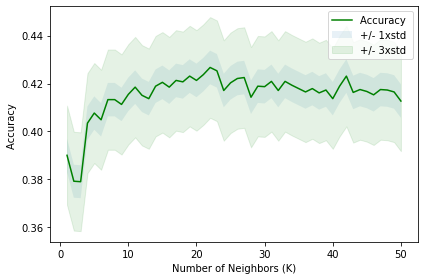

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.42668533706741346 with k= 22


In [ ]:
k = 22
knn_clf = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors = k))
knn_clf.fit(X_train,y_train)
knn_yhat = knn_clf.predict(X_test)
knn_yhat[0:5]

array([1, 1, 3, 4, 2])

In [ ]:
knn_acc_train = round( metrics.accuracy_score(y_train, knn_clf.predict(X_train))*100 ,2)
knn_acc_test = round( metrics.accuracy_score(y_test, knn_yhat)*100 ,2)
knn_jac_train = round( metrics.jaccard_score(y_train, knn_clf.predict(X_train),average='weighted')*100 ,2)
knn_jac_test = round( metrics.jaccard_score(y_test, knn_yhat,average='weighted')*100 ,2)

knn_df1 = pd.DataFrame({'percent':[knn_acc_train,knn_acc_test,knn_jac_train,knn_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(knn_df1 , x='metric' , y='percent' , color='label' ,
             title='KNN Accuracy/Jaccard for Train/Test Data (First Try)' ,
             text="percent", barmode="group")
fig.show()

In [ ]:
from sklearn import metrics
print("Train set Accuracy: %", round( 100* metrics.accuracy_score(y_train, knn_clf.predict(X_train)),2)) 
print("Test set Accuracy: %", round( 100* metrics.accuracy_score(y_test, knn_yhat),2))  
print('')
print (classification_report(y_test, knn_yhat))

Train set Accuracy: % 50.75
Test set Accuracy: % 42.67

              precision    recall  f1-score   support

           1       0.52      0.45      0.48      1243
           2       0.45      0.36      0.40      1234
           3       0.40      0.45      0.43      1235
           4       0.37      0.44      0.40      1287

    accuracy                           0.43      4999
   macro avg       0.44      0.43      0.43      4999
weighted avg       0.43      0.43      0.43      4999



Confusion matrix, without normalization


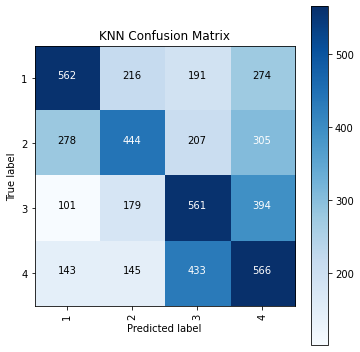

In [ ]:
knn_cnf_matrix = confusion_matrix(y_test, knn_yhat)
np.set_printoptions(precision=2)

labels = [1,2,3,4]

plt.figure(figsize=(5,5))
plot_confusion_matrix(knn_cnf_matrix, classes=labels ,normalize= False,  title='KNN Confusion Matrix')

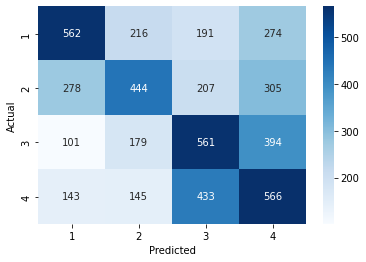

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = pd.crosstab(y_test, knn_yhat, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True,cmap='Blues' , fmt='')
plt.show()

In [ ]:
knn_clf = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors = 1))
# cross_validate(knn_clf, X, Y, cv=5, scoring=scores)

knn_avg_f1_weighted  = cross_validate(knn_clf, X, y, cv=5, scoring=scores)['test_f1_weighted'].mean()*100
knn_avg_prc_weighted = cross_validate(knn_clf, X, y, cv=5, scoring=scores)['test_precision_weighted'].mean()*100
knn_avg_rec_weighted = cross_validate(knn_clf, X, y, cv=5, scoring=scores)['test_recall_weighted'].mean()*100
knn_avg_acc          = cross_validate(knn_clf, X, y, cv=5, scoring=scores)['test_accuracy'].mean()*100

## decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
InstrumentTree = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='gini',max_depth =14))
InstrumentTree.fit(X_train,y_train)

predTree = InstrumentTree.predict(X_test)

dt_acc_train = round( metrics.accuracy_score(y_train, InstrumentTree.predict(X_train))*100 ,2)
dt_acc_test = round( metrics.accuracy_score(y_test, predTree)*100 ,2)
dt_jac_train = round( metrics.jaccard_score(y_train, InstrumentTree.predict(X_train),average='weighted')*100 ,2)
dt_jac_test = round( metrics.jaccard_score(y_test, predTree,average='weighted')*100 ,2)

dt_df1 = pd.DataFrame({'percent':[dt_acc_train,dt_acc_test,dt_jac_train,dt_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(dt_df1 , x='metric' , y='percent' , color='label' ,
             title='Decision Tree Accuracy/Jaccard for Train/Test Data (First Try)' ,
             text="percent", barmode="group")
fig.show()

Train set Accuracy: % 90
Test set Accuracy: % 34

              precision    recall  f1-score   support

           1       0.38      0.40      0.39      1243
           2       0.33      0.36      0.35      1234
           3       0.31      0.26      0.28      1235
           4       0.33      0.33      0.33      1287

    accuracy                           0.34      4999
   macro avg       0.34      0.34      0.34      4999
weighted avg       0.34      0.34      0.34      4999

Confusion matrix, without normalization


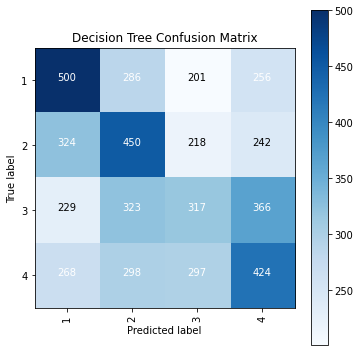

In [ ]:
print("Train set Accuracy: %", round( 100* metrics.accuracy_score(y_train, InstrumentTree.predict(X_train))))
print("Test set Accuracy: %", round( 100* metrics.accuracy_score(y_test, predTree)))  
print('')
print (classification_report(y_test, predTree))

from sklearn.metrics import confusion_matrix

dt_cnf_matrix = confusion_matrix(y_test, predTree)
np.set_printoptions(precision=2)

labels = [1,2,3,4]

plt.figure(figsize=(5,5))
plot_confusion_matrix(dt_cnf_matrix, classes=labels ,normalize= False,  title='Decision Tree Confusion Matrix')

In [ ]:
dt_clf = make_pipeline(preprocessing.StandardScaler(), DecisionTreeClassifier(criterion='gini',max_depth =14))
# cross_validate(dt_clf, X, Y, cv=5, scoring=scores)

dt_avg_f1_weighted  = cross_validate(dt_clf, X, y, cv=3, scoring=scores)['test_f1_weighted'].mean()*100
dt_avg_prc_weighted = cross_validate(dt_clf, X, y, cv=3, scoring=scores)['test_precision_weighted'].mean()*100
dt_avg_rec_weighted = cross_validate(dt_clf, X, y, cv=3, scoring=scores)['test_recall_weighted'].mean()*100
dt_avg_acc          = cross_validate(dt_clf, X, y, cv=3, scoring=scores)['test_accuracy'].mean()*100

## mlp

In [ ]:
MLP_clf = make_pipeline(preprocessing.StandardScaler(),  MLPClassifier(alpha=0.1,hidden_layer_sizes=(4, 2), random_state=0))
MLP_clf = MLP_clf.fit(X_train, y_train)
MLP_Y_pred=MLP_clf.predict(X_test)

print('accuracy:\n',accuracy_score(y_test, MLP_Y_pred))

accuracy:
 0.4386877375475095


In [ ]:
MLP_acc_train = round( metrics.accuracy_score(y_train, MLP_clf.predict(X_train))*100 ,2)
MLP_acc_test = round( metrics.accuracy_score(y_test, MLP_Y_pred)*100 ,2)
MLP_jac_train = round( metrics.jaccard_score(y_train, MLP_clf.predict(X_train),average='weighted')*100 ,2)
MLP_jac_test = round( metrics.jaccard_score(y_test, MLP_Y_pred,average='weighted')*100 ,2)

MLP_df1 = pd.DataFrame({'percent':[MLP_acc_train,MLP_acc_test,MLP_jac_train,MLP_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(MLP_df1 , x='metric' , y='percent' , color='label' ,
             title='MLP Accuracy/Jaccard for Train/Test Data (First Try)' ,
             text="percent", barmode="group")
fig.show()

In [ ]:
print("Train set Accuracy: %", round( 100* metrics.accuracy_score(y_train, MLP_clf.predict(X_train))))
print("Test set Accuracy: %", round( 100* metrics.accuracy_score(y_test, MLP_Y_pred)))  
print('')
print (classification_report(y_test, MLP_Y_pred))

Train set Accuracy: % 49
Test set Accuracy: % 44

              precision    recall  f1-score   support

           1       0.51      0.52      0.51      1243
           2       0.47      0.50      0.48      1234
           3       0.40      0.59      0.48      1235
           4       0.34      0.16      0.21      1287

    accuracy                           0.44      4999
   macro avg       0.43      0.44      0.42      4999
weighted avg       0.43      0.44      0.42      4999



Confusion matrix, without normalization


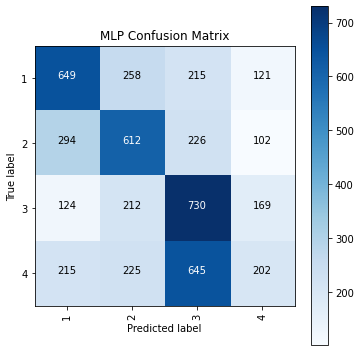

In [ ]:
MLP_cnf_matrix = confusion_matrix(y_test, MLP_Y_pred)
np.set_printoptions(precision=2)

labels = [1,2,3,4]

plt.figure(figsize=(5,5))
plot_confusion_matrix(MLP_cnf_matrix, classes=labels ,normalize= False,  title='MLP Confusion Matrix')

In [ ]:

MLP_clf = make_pipeline(preprocessing.StandardScaler(),  MLPClassifier(alpha=0.1,hidden_layer_sizes=(4, 2), random_state=0))


MLP_avg_f1_weighted  = cross_validate(MLP_clf, X, y, cv=3, scoring=scores)['test_f1_weighted'].mean()*100
MLP_avg_prc_weighted = cross_validate(MLP_clf, X, y, cv=3, scoring=scores)['test_precision_weighted'].mean()*100
MLP_avg_rec_weighted = cross_validate(MLP_clf, X, y, cv=3, scoring=scores)['test_recall_weighted'].mean()*100
MLP_avg_acc          = cross_validate(MLP_clf, X, y, cv=3, scoring=scores)['test_accuracy'].mean()*100

# compare models

In [ ]:
comp_df = pd.DataFrame({'Classifier Algorithm':['Logistic Regression' , 'SVM' , 'Decision Tree' , 'KNN' , 'MLP'],
                        'Acc Avg': [round(lr_avg_acc, 2) , round(svm_avg_acc, 2) , 
                                          round(dt_avg_acc, 2) , round(knn_avg_acc, 2) , round(MLP_avg_acc, 2)],
                        'Rec Avg': [round(lr_avg_rec_weighted, 2) , round(svm_avg_rec_weighted, 2) , 
                                        round(dt_avg_rec_weighted, 2) , round(knn_avg_rec_weighted, 2) , 
                                        round(MLP_avg_rec_weighted, 2)],
                        'Prc Avg': [round(lr_avg_prc_weighted, 2) , round(svm_avg_prc_weighted, 2) , 
                                        round(dt_avg_prc_weighted, 2) , round(knn_avg_prc_weighted, 2) , 
                                        round(MLP_avg_prc_weighted, 2)],
                        'F1 Avg' : [round(lr_avg_f1_weighted, 2) , round(svm_avg_f1_weighted, 2) , 
                                        round(dt_avg_f1_weighted, 2) , round(knn_avg_f1_weighted, 2) , 
                                        round(MLP_avg_f1_weighted, 2)]})

fig = px.bar(comp_df , x='Classifier Algorithm' , y='Acc Avg' , color='Classifier Algorithm' ,
             title='Comparison of Accuracy Average (After Cross Validation) Between Different Algorithms' ,
             text="Acc Avg")
fig.show()

fig = px.bar(comp_df , x='Classifier Algorithm' , y='Rec Avg' , color='Classifier Algorithm' ,
             title='Comparison of Weighted_Recall Average (After Cross Validation) Between Different Algorithms' ,
             text="Rec Avg")
fig.show()

fig = px.bar(comp_df , x='Classifier Algorithm' , y='Prc Avg' , color='Classifier Algorithm' ,
             title='Comparison of Weighted_Precision Average (After Cross Validation) Between Different Algorithms' ,
             text="Prc Avg")
fig.show()

fig = px.bar(comp_df , x='Classifier Algorithm' , y='F1 Avg' , color='Classifier Algorithm' ,
             title='Comparison of Weighted_F1score Average (After Cross Validation) Between Different Algorithms' ,
             text="F1 Avg")
fig.show()

# classification with pca

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['sex','emotionID','Unnamed: 0'],1)   #Feature Matrix
y = df["emotionID"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
len(explained_variance)

71

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

lr_clf = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', class_weight='balanced' , C = 0.1))     # Best Result
lr_clf.fit(X_train, y_train)
lr_yhat = lr_clf.predict(X_test)

In [ ]:
import plotly.express as px
from sklearn import metrics

lr_acc_train = round( metrics.accuracy_score(y_train, lr_clf.predict(X_train))*100 ,2)
lr_acc_test = round( metrics.accuracy_score(y_test, lr_yhat)*100 ,2)
lr_jac_train = round( metrics.jaccard_score(y_train, lr_clf.predict(X_train),average='weighted')*100 ,2)
lr_jac_test = round( metrics.jaccard_score(y_test, lr_yhat,average='weighted')*100 ,2)

lr_df1 = pd.DataFrame({'percent':[lr_acc_train,lr_acc_test,lr_jac_train,lr_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(lr_df1 , x='metric' , y='percent' , color='label' ,
             title='Logistic Regression Accuracy/Jaccard for Train/Test Data (First Try) with pca' ,
             text="percent", barmode="group")
fig.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

print("Train set Accuracy: %", round( 100* metrics.accuracy_score(y_train, lr_clf.predict(X_train))))
print("Test set Accuracy: %", round( 100* metrics.accuracy_score(y_test, lr_yhat)))
print('')
print (classification_report(y_test, lr_yhat))

Train set Accuracy: % 46
Test set Accuracy: % 44

              precision    recall  f1-score   support

           1       0.53      0.46      0.49      1243
           2       0.48      0.46      0.47      1234
           3       0.41      0.49      0.45      1235
           4       0.38      0.38      0.38      1287

    accuracy                           0.44      4999
   macro avg       0.45      0.45      0.45      4999
weighted avg       0.45      0.44      0.45      4999



Confusion matrix, without normalization


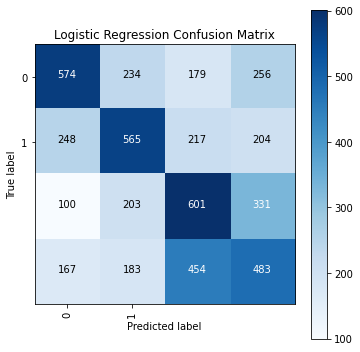

In [ ]:
lr_cnf_matrix = confusion_matrix(y_test, lr_yhat)
np.set_printoptions(precision=2)

labels = [0,1]

plt.figure(figsize=(5,5))
plot_confusion_matrix(lr_cnf_matrix, classes=labels ,normalize= False,  title='Logistic Regression Confusion Matrix')

## svm

In [ ]:
from sklearn import svm
svm_clf = make_pipeline(StandardScaler(), svm.SVC(kernel='rbf',C=10))
svm_clf.fit(X_train,y_train)
svm_yhat = svm_clf.predict(X_test)


In [ ]:
svm_acc_train = round( metrics.accuracy_score(y_train, svm_clf.predict(X_train))*100 ,2)
svm_acc_test = round( metrics.accuracy_score(y_test, svm_yhat)*100 ,2)
svm_jac_train = round( metrics.jaccard_score(y_train, svm_clf.predict(X_train),average='weighted')*100 ,2)
svm_jac_test = round( metrics.jaccard_score(y_test, svm_yhat,average='weighted')*100 ,2)

svm_df1 = pd.DataFrame({'percent':[svm_acc_train,svm_acc_test,svm_jac_train,svm_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(svm_df1 , x='metric' , y='percent' , color='label' ,
             title='SVM Accuracy/Jaccard for Train/Test Data with pca(First Try)' ,
             text="percent", barmode="group")
fig.show()

In [ ]:
print("Train set Accuracy: %", round( 100* metrics.accuracy_score(y_train, svm_clf.predict(X_train))))
print("Test set Accuracy: %", round( 100* metrics.accuracy_score(y_test, svm_yhat))) 
print('')
print (classification_report(y_test, svm_yhat))

Train set Accuracy: % 80
Test set Accuracy: % 49

              precision    recall  f1-score   support

           1       0.53      0.54      0.53      1243
           2       0.52      0.47      0.49      1234
           3       0.48      0.48      0.48      1235
           4       0.45      0.47      0.46      1287

    accuracy                           0.49      4999
   macro avg       0.49      0.49      0.49      4999
weighted avg       0.49      0.49      0.49      4999



Confusion matrix, without normalization


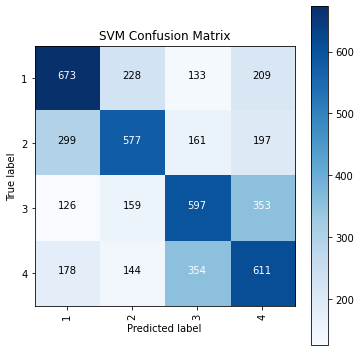

In [ ]:
svm_cnf_matrix = confusion_matrix(y_test, svm_yhat)
np.set_printoptions(precision=2)

labels = [1,2,3,4]

plt.figure(figsize=(5,5))
plot_confusion_matrix(svm_cnf_matrix, classes=labels ,normalize= False,  title='SVM Confusion Matrix')

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


Ks = 51
mean_acc = np.zeros((Ks-1))
mean_rec = np.zeros((Ks-1)) 
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors = n)).fit(X_train,y_train)
    knn_yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_yhat)
    std_acc[n-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

mean_acc 

array([0.39, 0.39, 0.4 , 0.4 , 0.41, 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.41,
       0.4 , 0.41, 0.42, 0.41, 0.41, 0.4 , 0.41, 0.41, 0.41, 0.41, 0.41,
       0.41, 0.41, 0.41, 0.41, 0.41, 0.41, 0.4 , 0.4 , 0.4 , 0.4 , 0.4 ,
       0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.4 , 0.39,
       0.4 , 0.4 , 0.4 , 0.39, 0.39, 0.39])

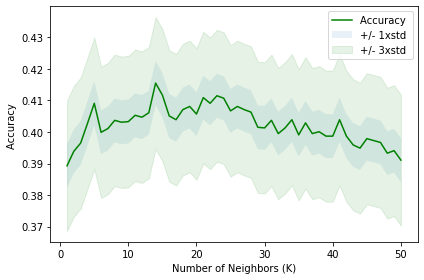

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


The best accuracy was with 0.41548309661932387 with k= 14


In [ ]:
k = 14
knn_clf = make_pipeline(preprocessing.StandardScaler(), KNeighborsClassifier(n_neighbors = k))
knn_clf.fit(X_train,y_train)
knn_yhat = knn_clf.predict(X_test)
knn_yhat[0:5]

array([2, 2, 3, 3, 3])

In [ ]:
knn_acc_train = round( metrics.accuracy_score(y_train, knn_clf.predict(X_train))*100 ,2)
knn_acc_test = round( metrics.accuracy_score(y_test, knn_yhat)*100 ,2)
knn_jac_train = round( metrics.jaccard_score(y_train, knn_clf.predict(X_train),average='weighted')*100 ,2)
knn_jac_test = round( metrics.jaccard_score(y_test, knn_yhat,average='weighted')*100 ,2)

knn_df1 = pd.DataFrame({'percent':[knn_acc_train,knn_acc_test,knn_jac_train,knn_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(knn_df1 , x='metric' , y='percent' , color='label' ,
             title='KNN Accuracy/Jaccard for Train/Test Data (First Try)' ,
             text="percent", barmode="group")
fig.show()

In [ ]:
from sklearn import metrics
print("Train set Accuracy: %", round( 100* metrics.accuracy_score(y_train, knn_clf.predict(X_train)),2)) 
print("Test set Accuracy: %", round( 100* metrics.accuracy_score(y_test, knn_yhat),2))  
print('')
print (classification_report(y_test, knn_yhat))

Train set Accuracy: % 53.32
Test set Accuracy: % 41.55

              precision    recall  f1-score   support

           1       0.47      0.42      0.45      1243
           2       0.45      0.30      0.36      1234
           3       0.39      0.49      0.43      1235
           4       0.39      0.45      0.41      1287

    accuracy                           0.42      4999
   macro avg       0.42      0.42      0.41      4999
weighted avg       0.42      0.42      0.41      4999



Confusion matrix, without normalization


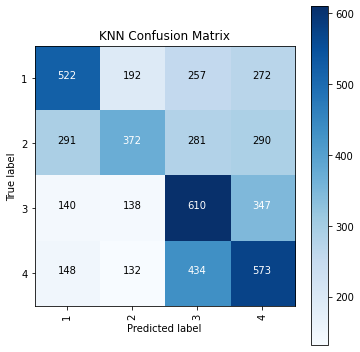

In [ ]:
knn_cnf_matrix = confusion_matrix(y_test, knn_yhat)
np.set_printoptions(precision=2)

labels = [1,2,3,4]

plt.figure(figsize=(5,5))
plot_confusion_matrix(knn_cnf_matrix, classes=labels ,normalize= False,  title='KNN Confusion Matrix')

## decision tree

In [ ]:
InstrumentTree = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='gini',max_depth =14))
InstrumentTree.fit(X_train,y_train)

predTree = InstrumentTree.predict(X_test)

In [ ]:
dt_acc_train = round( metrics.accuracy_score(y_train, InstrumentTree.predict(X_train))*100 ,2)
dt_acc_test = round( metrics.accuracy_score(y_test, predTree)*100 ,2)
dt_jac_train = round( metrics.jaccard_score(y_train, InstrumentTree.predict(X_train),average='weighted')*100 ,2)
dt_jac_test = round( metrics.jaccard_score(y_test, predTree,average='weighted')*100 ,2)

dt_df1 = pd.DataFrame({'percent':[dt_acc_train,dt_acc_test,dt_jac_train,dt_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(dt_df1 , x='metric' , y='percent' , color='label' ,
             title='Decision Tree Accuracy/Jaccard for Train/Test Data (First Try)' ,
             text="percent", barmode="group")
fig.show()

Confusion matrix, without normalization


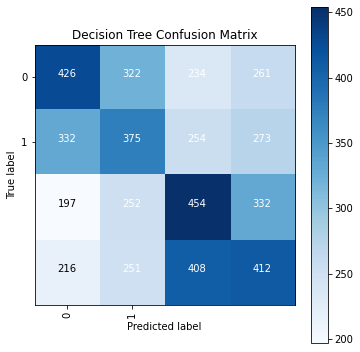

In [ ]:
dt_cnf_matrix = confusion_matrix(y_test, predTree)
np.set_printoptions(precision=2)

labels = [0,1]

plt.figure(figsize=(5,5))
plot_confusion_matrix(dt_cnf_matrix, classes=labels ,normalize= False,  title='Decision Tree Confusion Matrix')

## mlp

In [ ]:
MLP_clf = make_pipeline(preprocessing.StandardScaler(),  MLPClassifier(alpha=0.1,hidden_layer_sizes=(4, 2), random_state=0))
MLP_clf = MLP_clf.fit(X_train, y_train)
MLP_Y_pred=MLP_clf.predict(X_test)

print('accuracy:\n',accuracy_score(y_test, MLP_Y_pred))

accuracy:
 0.4280856171234247


In [ ]:
MLP_acc_train = round( metrics.accuracy_score(y_train, MLP_clf.predict(X_train))*100 ,2)
MLP_acc_test = round( metrics.accuracy_score(y_test, MLP_Y_pred)*100 ,2)
MLP_jac_train = round( metrics.jaccard_score(y_train, MLP_clf.predict(X_train),average='weighted')*100 ,2)
MLP_jac_test = round( metrics.jaccard_score(y_test, MLP_Y_pred,average='weighted')*100 ,2)

MLP_df1 = pd.DataFrame({'percent':[MLP_acc_train,MLP_acc_test,MLP_jac_train,MLP_jac_test],
                       'label' : ['train' , 'test' , 'train' , 'test'],
                       'metric': ['Accuracy' , 'Accuracy' , 'Weighted Jaccard Score' , 'Weighted Jaccard Score']})


fig = px.bar(MLP_df1 , x='metric' , y='percent' , color='label' ,
             title='MLP Accuracy/Jaccard for Train/Test Data (First Try)' ,
             text="percent", barmode="group")
fig.show()

In [ ]:
print("Train set Accuracy: %", round( 100* metrics.accuracy_score(y_train, MLP_clf.predict(X_train))))
print("Test set Accuracy: %", round( 100* metrics.accuracy_score(y_test, MLP_Y_pred)))  
print('')
print (classification_report(y_test, MLP_Y_pred))

Train set Accuracy: % 45
Test set Accuracy: % 43

              precision    recall  f1-score   support

           1       0.54      0.43      0.48      1243
           2       0.47      0.47      0.47      1234
           3       0.38      0.53      0.44      1235
           4       0.35      0.29      0.32      1287

    accuracy                           0.43      4999
   macro avg       0.44      0.43      0.43      4999
weighted avg       0.43      0.43      0.43      4999



Confusion matrix, without normalization


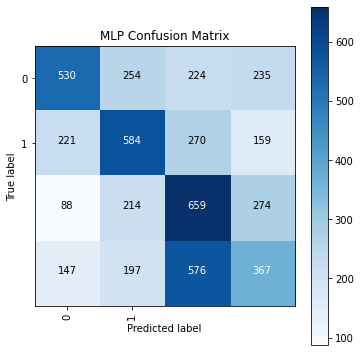

In [ ]:
MLP_cnf_matrix = confusion_matrix(y_test, MLP_Y_pred)
np.set_printoptions(precision=2)

labels = [0,1]

plt.figure(figsize=(5,5))
plot_confusion_matrix(MLP_cnf_matrix, classes=labels ,normalize= False,  title='MLP Confusion Matrix')

In [ ]:
print (classification_report(y_test, MLP_Y_pred))


              precision    recall  f1-score   support

           1       0.54      0.43      0.48      1243
           2       0.47      0.47      0.47      1234
           3       0.38      0.53      0.44      1235
           4       0.35      0.29      0.32      1287

    accuracy                           0.43      4999
   macro avg       0.44      0.43      0.43      4999
weighted avg       0.43      0.43      0.43      4999



In [ ]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [ ]:
fper, tper, thresholds = roc_curve(y_test, MLP_Y_pred)
plot_roc_curve(fper, tper)

ValueError: ignored